## Solution of Multi-component Chemical Reactor using scipy.integrate.odeint

In [4]:
from __future__          import division               # all of the code below is the boilerplate
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob              as gb
import time
from scipy.optimize      import curve_fit
from scipy.optimize      import fsolve
from scipy.integrate     import odeint, quad
from scipy.interpolate   import interp1d
from scipy.misc          import derivative
from sympy               import *
from scipy import polyval, polyfit
init_printing()          # for pretty output for symbolic math

In [16]:
#Define given constants

T0 = 100+273
Tref = 298
k1_373 = 2e-3  #s**-1
k2_373 = 3e-5  #s**-1
Ca0 = 0.1  #M
Cb0 = 0.125  #M
ΔH0_rxn = -40000
E1 = 100000  #J/mol
E2 = 150000  #J/mol
Cpa = 25  #J/mol-K
Cpb = Cpa
Cpc = 40  #J/mol-K
R = 8.3145  #J/mol-K


#Define function for reaction rates as related to time.
def rates(X,t):
    xa = X[0]
    T = X[1]
    
    Ca = Ca0 - Ca0*xa
    Cb = Cb0 - Ca0*xa
    Cc = Ca0*xa
    k1 = k1_373*np.exp(E1/R * (1/373 - 1/T))
    k2 = k2_373*np.exp(E2/R * (1/373 - 1/T))
    
    r = k1*Ca**(1/2)*Cb**(1/2) - k2*Cc
    
    ΔH_rxn = ΔH0_rxn + (Cpc - Cpa - Cpb)*(T-Tref)
    
    return r/Ca0, -r*ΔH_rxn / (Ca*Cpa + Cb*Cpb + Cc*Cpc)


#same as above, but for second reaction
def rates1(X,t):
    Ca = X[0]
    Cb = X[1]
    Cc = X[2]
    T = X[3]
    k1 = k1_373*np.exp(E1/R * (1/373 - 1/T))
    k2 = k2_373*np.exp(E2/R * (1/373 - 1/T))
    
    r = k1*Ca**(1/2)*Cb**(1/2) - k2*Cc
    
    ΔH_rxn = ΔH0_rxn + (Cpc - Cpa - Cpb)*(T-Tref)
    
    return -r, -r, r, -r*ΔH_rxn / (Ca*Cpa + Cb*Cpb + Cc*Cpc)
    
#Create array of initial values
init = np.array([Ca0,Cb0,0,T0])
t = np.linspace(0,10,200)

#Use scipy to solve system of differential equations
ans = odeint(rates1, init, t)

Ca = ans[:,0]
Cb = ans[:,1]
Cc = ans[:,2]
T = ans[:,3]
Xa = (Ca0 - Ca)/Ca0


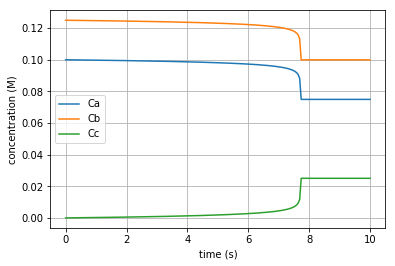

In [17]:
#plot the concentrations with respect to time
plt.plot(t,Ca,label='Ca')
plt.plot(t,Cb,label='Cb')
plt.plot(t,Cc,label='Cc')
plt.xlabel('time (s)')
plt.ylabel('concentration (M)')
plt.legend()
plt.grid()

Text(0.5,1,'T vs t')

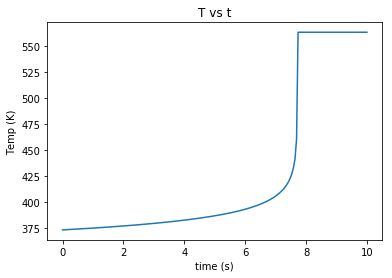

In [18]:
#Plot temp vs. time
plt.plot(t,T)
plt.ylabel("Temp (K)")
plt.xlabel("time (s)")
plt.title("T vs t")

Text(0.5,1,'Xa vs t')

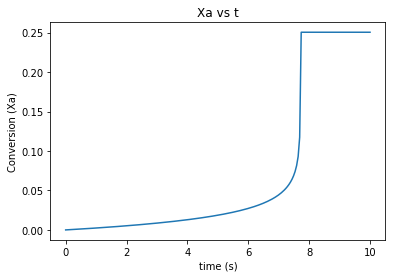

In [19]:
#Plot conversion vs time
plt.plot(t,Xa)
plt.ylabel("Conversion (Xa)")
plt.xlabel("time (s)")
plt.title("Xa vs t")